# [NTDS'18] milestone 4: graph signal processing
[ntds'18]: https://github.com/mdeff/ntds_2018

[Rodrigo Pena](https://people.epfl.ch/254838), [EPFL LTS2](http://lts2.epfl.ch)

## Students

* Team: `<your team number>`
* Students: `<the name of all students in the team>`
* Dataset: `<the dataset you used to complete the milestone>`

## Rules

* Milestones have to be completed by teams. No collaboration between teams is allowed.
* Textual answers shall be short. Typically one to two sentences.
* Code has to be clean.
* You cannot import any other library than we imported.
* When submitting, the notebook is executed and the results are stored. I.e., if you open the notebook again it should show numerical results and plots. We won't be able to execute your notebooks.
* The notebook is re-executed from a blank state before submission. That is to be sure it is reproducible. You can click "Kernel" then "Restart & Run All" in Jupyter.

## Objective

The goal of this milestone is to do some Graph Signal Processing (GSP) on the data of your project.

### A note about plotting

There are several questions in this milestone that ask you to plot a signal on your network.
There are several ways from which you could approach it.
In all cases, compute the position of the nodes a single time at the beginning, as this is likely to be a costly operation.
Using a single layout for all the graph plots will also make it easier to compare the plots.
Indeed, the only thing changing between plots is the signal displayed.
You can represent the features/labels lying on the graph via node **colors**.
To do so, make sure to have a consistent color map throughout and remember to display a colorbar and scale in all plots, so that we can tell what numbers the colors represent.

* An option is to use the **Laplacian eigenmaps** that you have seen in the previous milestone to embed your graph on the plane. For example:
  ```
  from matplotlib import pyplot as plt
  plt.scatter(eigenvectors[:, 1], eigenvectors[:, 2], c=signal, alpha=0.5)
  plt.colorbar()
  ```
* Another option is to use the plotting capabilities of **[NetworkX](https://networkx.github.io)**.
  See the documentation of its [drawing methods](https://networkx.github.io/documentation/stable/reference/drawing.html).
  For example:
  ```
  import networkx as nx
  graph = nx.from_scipy_sparse_matrix(adjacency)
  coords = nx.spring_layout(graph)  # Force-directed layout.
  coords = eigenvectors[:, 1:3]  # Laplacian eigenmaps.
  nx.draw_networkx_nodes(graph, coords, node_size=60, node_color=signal)
  nx.draw_networkx_edges(graph, coords, alpha=0.3)
  ```
* Another option is to use the plotting capabilities of the **[PyGSP](https://github.com/epfl-lts2/pygsp)**, a Python package for Graph Signal Processing.
  **Note that your are forbidden to use the PyGSP for anything else than plotting.**
  See the documentation of its [plotting utilities](https://pygsp.readthedocs.io/en/stable/reference/plotting.html).
  For example:
  ```
  import pygsp as pg
  graph = pg.graphs.Graph(adjacency)
  graph.set_coordinates('spring')  # Force-directed layout.
  graph.set_coordinates(eigenvectors[:, 1:3])  # Laplacian eigenmaps.
  graph.plot_signal(signal)
  ```
* Yet another option is to save your graph on disk, use **[Gephi](https://gephi.org)** externally, to visualize the graph, save the graph with the Gephi coordinates and finally load the nodes coordinates back into the notebook.

We encourage you to try all the above methods before making your choice. Then be consistent and use only one throughout the milestone.
NetworkX and PyGSP should already be installed in your environement. If that's not the case, install with `conda install networkx pygsp` (after activating the `ntds_2018` environment).

## 0 - Load your network

In [ ]:
%matplotlib inline

If you get a `No module named 'pyunlocbox'` error when running the below cell, install the [pyunlocbox](https://github.com/epfl-lts2/pyunlocbox) with `conda install pyunlocbox` (after activating the `ntds_2018` environment).

In [ ]:
import numpy as np
from scipy import sparse
import scipy.sparse.linalg
from matplotlib import pyplot as plt
from pyunlocbox import functions, solvers

For this milestone, all we will need is a set of features/labels for each of the nodes on the network, as well as the Laplacian, $L,$ and Gradient, $\nabla_G,$ matrices that you have computed for your network while working on milestone 3.

Import those objects in the cell below (or recompute the Laplacian and Gradient from your stored adjacency matrix, if you wish).

_Note_: If your features/labels are not floating-point numbers, please convert them. For example, if your data has labels "cat" and "dog" for nodes that represent cats or dogs, respectively, you may assign the number `1.0` for the label "cat" and the number `-1.0` for the label "dog".  

In [ ]:
laplacian = # Your code here.
gradient = # Your code here.
labels = # Your code here.
n_nodes = # Your code here.

## 1 - Graph Fourier Transform

In this section we will observe how your feature/label vector looks like in the "Graph Fourier" domain.

### Question 1

Compute the Fourier basis vectors and the Laplacian eigenvalues. Make sure to order those from smaller to larger, $\lambda_0 \leq \lambda_1 \leq \dots \leq \lambda_{N-1},$ and use the same ordering for the Fourier basis vectors.

In [ ]:
e = # Ordered Laplacian eigenvalues.
U = # Ordered graph Fourier basis.

Plot the first 3 and the last Fourier basis vectors as signals on your graph. Clearly indicate which plot belongs to which basis vector.

In [ ]:
# Your code here.

### Question 2

What can you observe in terms of local variations when comparing the basis vectors corresponding to the smallest eigenvalues to those corresponding to the largest eigenvalue? How would this justify the interpretation of the eigenvalues as "graph frequencies"?

**Your answer here.**

### Question 3

Implement a function that returns the Graph Fourier Transform (GFT) of a given vector $x \in \mathbb{R}^{N},$ with respect to your graph, and a function that computes the corresponding inverse GFT (iGFT).

In [ ]:
def GFT(x):
    return # Your code here.

def iGFT(x):
    return # Your code here.

### Question 4

Plot your feature/label vector as a signal on your graph

In [ ]:
# Your code here.

Plot the absolute values of the GFT of your feature/label signal as a function of the graph eigenvalues. Make sure to add a marker indicating the position of each graph eigenvalue, and remember to properly name the axes.

In [ ]:
# Your code here.

### Question 5

Discuss the behavior of the GFT that you plotted in the last question via comparing the plot of your label signal and those of the Fourier basis of Question 1. Would you consider your labels a "low-pass" or "high-pass" signal, or yet something else entirely?

**Your answer here.**

## 2 - Filtering on graphs

In this section we will check how filtered Dirac impulses diffuse on your graph.

### Question 6 

Implement the following three filter kernels and the graph filtering operation.

- The **heat kernel** is supposed to take in a vector of eigenvalues `e` and a parameter `t` and output a vector of evaluations of the heat kernel at those eigenvalues (see the course slides for help).
- The **inverse filter** kernel is supposed to take in a vector of eigenvalues `e` and a parameter `t` and implement spectrally the  filter defined in the node domain by $f_{out}  = (I + t L)^{-1} f_{in},$ where $f_{in}, f_{out} \in \mathbb{R}^{N}$ are, repectively, the input and output signals to the filter.
- The **rectangle kernel** takes in a vector of eigenvalues `e` and parameters `l_min` and `l_max` and returns `1.0` at coordinates satisfying $(e[l] \geq l_{min}) \wedge (e[l] \leq l_{max}),$ and `0.0` otherwise.
- The **graph filtering** operation takes a graph signal $x \in \mathbb{R}^{N}$, a spectral graph `kernel` and a set of keyworded variables, and returns the corresponding filtered signal.
    - _Hint:_ Remember that you have implemented the `GFT` and `iGFT` operations in Question 3.
    - The `**kwargs` is a placeholder to collect supplementary pairs of keyword-values that are not known by the implementation before execution time.
      The `kwargs` variable is a dictionary whose keyes and values are the parameter names and values.
      This is useful to allow both `graph_filter(x, heat_kernel, tau=1.0)` and `graph_filter(x, rectangle_kernel, lambda_min=0.0, lambda_max=1.0)` to be valid calls from the same implementation.
      One can then defer the keyword-value assignment to the `kernel` call: `foo = kernel(bar, **kwargs)`.

In [ ]:
def heat_kernel(e, t):
    return # Your code here.

def inverse_kernel(e, t):
    return # Your code here.

def rectangle_kernel(e, l_min, l_max):
    return # Your code here.

def graph_filter(x, kernel, **kwargs):
    return # Your code here.

### Question 7

Plot all three filter kernels in the spectral domain. Remember to properly name the axes and title the plots. Choose filter parameters that best approximate the behavior of the GFT of your feature/label signal (as seen in Question 4).

In [ ]:
# Your code here.

### Question 8

Consider two Dirac impulses arbitrarily placed on your graph. Plot their filtered versions by the three filter kernels implemented in Question 6.

In [ ]:
# Your code here.

Comment on the "diffusion" of the Diracs induced by the filters. What does it say about the "communication" of information across your network? Relate that to the network connectivity measures that you analyzed during the previous milestones.

**Your answer here.**

## 3 - De-noising

In this section we will add some centered Gaussian noise to your feature/label signal and attempt to recover it.

### Question 9

In the cell below, set the noise variance $\sigma^2$ by making sure that the signal-to-noise ratio $SNR = \frac{\operatorname{Var}(\text{labels})}{\sigma^2}$ is about  $1.5$.

_Note:_ Actually, you might want to play with the noise variance here and set it to different values and see how the denoising filters behave.

In [ ]:
noise_variance = # Your code here.
noisy_measurements = labels + noise_variance * np.random.randn(n_nodes)

### Question 10

In the denoising setting, a common graph signal processing assumption is that the signal $z$ that we want to recover is "smooth", in the sense that $\|\nabla_G z\|_2 = \sqrt{z^{\top} L z}$ is small, while remaining "close" to the measurements that we start with. This leads to denoising by solving the following optimization problem:

$$
z^\star = \text{arg} \, \underset{z \in \mathbb{R}^{N}}{\min} \, \|z - y\|_2^2 + \gamma z^{\top} L z, 
$$

where $y \in \mathbb{R}^{N}$ is the vector of noisy measurements.

Derive the close form solution to this problem giving $z^\star$ as a function of $y$, $\gamma$ and $L$. Does this solution correspond to any graph filtering operation that you know?

**Your answer here.**

### Question 11

Now, denoise the noisy measurements by passing them through the filters that you implemented in Question 6. Choose the filter parameters based on the behavior of the GFT of your original label signal (this is the prior knowledge that you input to the problem).

In [ ]:
z_heat_denoised = # Your code here.
z_inv_denoised = # Your code here.
z_rect_denoised = # Your code here.

Plot, on your graph, the original label signal, the noisy measurements, and the three denoised version obtained above. Report on each plot the value of the corresponding relative error 
$$
\text{rel-err} = \frac{\|\text{labels} - z \|_2}{\|\text{labels}\|_2},
$$
where $z$ is the plotted signal.

In [ ]:
# Your code here.

Finally, overlay on the same plot the GFT of all five signals above.

In [ ]:
# Your code here.

### Question 12

Comment on which denoised version seems to best match the original label signal. What is the underlying assumption behind the three filtering approaches? Do you think it holds for your label signal? Why?

**Your answer here.**

## 4 - Transductive learning

It is often the case in large networks that we can only afford to query properties/labels on a small subset of nodes. Nonetheless, if the underlying labels signal is "regular" enough, we might still be able to recover a good approximation of it by solving an offline variational problem, with constraints on the values of the measured nodes. 

In this section, we will be interested in solving such transductive learning problems by minimizing a (semi-) p-norm of the graph gradient applied to the signal of interest:

$$
\text{arg} \, \underset{z|_S = y}{\min} \|\nabla_G z\|_p^p,
$$

where $S$ is the set of measured nodes.

In English, we can say that we are looking for solutions with small "aggregated local variations", as measured by $\|\nabla_G z\|_p^p = \sum_{i=1}^{n} \sum_{j=1}^{n} \left( \sqrt{W_{ij}} |z[i] - z[j]| \right)^p,$ while satisfying the measurement constraints $z[i] = y[i]$ for $i \in S.$

We will work with two cases, according to the choices $p=1$ or $p=2.$ For $p=1,$ the problem is known as "interpolation by graph total-variation minimization," whereas for $p=2$ it is sometimes called "interpolation by Tikhonov regularization".

In order to solve these variational problems with the black-box solver provided to you, you will use the [pyunlocbox](https://pyunlocbox.readthedocs.io). This toolbox implements iterative solvers based on so-called ["proximal-splitting"](https://en.wikipedia.org/wiki/Proximal_gradient_method) methods.

### Question 13

Throughout this section, we will consider only a binarized version of your label signal. If your variable `labels` currently has values other than $\{-1, 1\},$ threshold them so that those are the only values taken in this vector. This can be done for example by choosing a number $t \in \mathbb{R}$ and then setting $\text{labels_bin}[i] = 1$ if $\text{labels}[i] \geq t$ and $\text{labels_bin}[i] = 0$ otherwise.

In [860]:
idx_hub = np.array([179, 225, 243, 383, 492])
label = np.zeros(n_nodes)
for i in idx_hub:
    label += GC[:,i]
label[label>0]=1
label[label==0]=-1

In [861]:
edge_idx = 0
n_edges = np.sum(GC > 0) / 2
n_nodes = GC.shape[0]
gradient = np.zeros([int(n_edges), int(n_nodes)])
for i in range(n_nodes):
    for j in range(i + 1, n_nodes):
        if W_GC[i, j] > 0:
            gradient[edge_idx, i] = -np.sqrt(W_GC[i, j]) * (label[j] - label[i])
            gradient[edge_idx, j] = -gradient[edge_idx, i]
            edge_idx += 1

In [633]:
labels_bin = np.copy(label)

In [634]:
labels_bin[label >= 0] = 1
labels_bin[label < 0] = -1

Now, subsample this binarized label signal by $70\%$ by choosing, uniformly at random, $30\%$ of the nodes whose labels we will keep.

You will do this by computing a "measurement mask" vector `w` with `1.0`'s at the measured coordinates, and $0.0$'s otherwise.

In [637]:
mn_ratio = 0.3
m = int(mn_ratio * n_nodes)  # Number of measurements.
w = np.ones_like(labels_bin)
mask_idx = np.random.permutation(n_nodes)[0:(n_nodes - m)]
w[mask_idx] = 0

Plot the subsampled signal on the graph. _Hint:_ you might want to set to `numpy.nan` the values of the un-measured nodes for a cleaner plot.

In [639]:
labels_bin_plt = np.copy(labels_bin)
labels_bin_plt[mask_idx] = np.nan

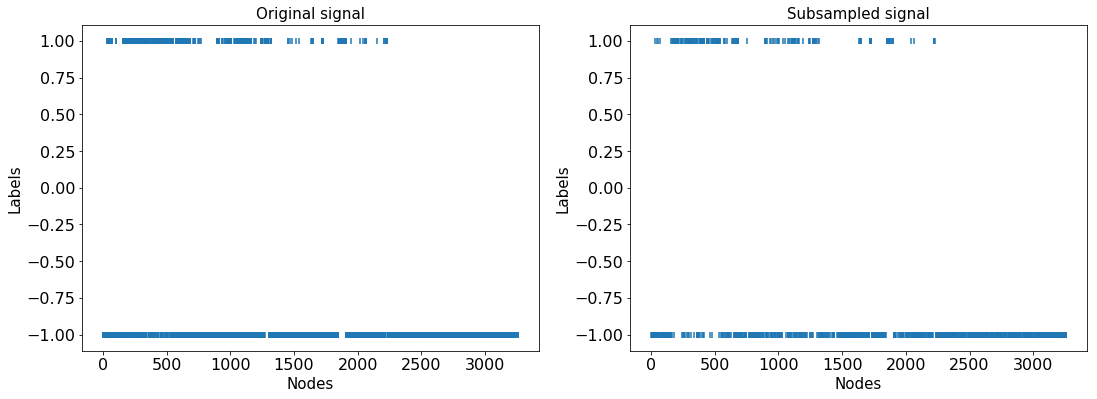

In [677]:
fig, ax = plt.subplots(1,2,figsize = [18,6])
ax[0].scatter(np.arange(n_nodes), labels_bin,marker='|')
ax[0].set_title('Original signal', fontdict={'fontsize':15})
ax[1].scatter(np.arange(n_nodes), labels_bin_plt,marker='|')
ax[1].set_title('Subsampled signal', fontdict={'fontsize':15})
for i in range(len(ax)):
    ax[i].tick_params(labelsize = 16)
    ax[i].set_xlabel('Nodes',fontdict={'fontsize':15})
    ax[i].set_ylabel('Labels',fontdict={'fontsize':15})

### Interlude

For the solution of the variational problems you can use the following function as a "black-box". 

You will just need to provide a `gradient` matrix (which you should already have from Section 0), and an orthogonal projection operator `P` onto the span of the measured coordinates (made precise in the next question).

In [642]:
def graph_pnorm_interpolation(gradient, P, x0=None, p=1., **kwargs):
    r"""
    Solve an interpolation problem via gradient p-norm minimization.

    A signal :math:`x` is estimated from its measurements :math:`y = A(x)` by solving
    :math:`\text{arg}\underset{z \in \mathbb{R}^n}{\min}
    \| \nabla_G z \|_p^p \text{ subject to } Az = y` 
    via a primal-dual, forward-backward-forward algorithm.

    Parameters
    ----------
    gradient : array_like
        A matrix representing the graph gradient operator
    P : callable
        Orthogonal projection operator mapping points in :math:`z \in \mathbb{R}^n` 
        onto the set satisfying :math:`A P(z) = A z`.
    x0 : array_like, optional
        Initial point of the iteration. Must be of dimension n.
        (Default is `numpy.random.randn(n)`)
    p : {1., 2.}
    kwargs :
        Additional solver parameters, such as maximum number of iterations
        (maxit), relative tolerance on the objective (rtol), and verbosity
        level (verbosity). See :func:`pyunlocbox.solvers.solve` for the full
        list of options.

    Returns
    -------
    x : array_like
        The solution to the optimization problem.

    """
    
    grad = lambda z: gradient.dot(z)
    div = lambda z: gradient.transpose().dot(z)

    # Indicator function of the set satisfying :math:`y = A(z)`
    f = functions.func()
    f._eval = lambda z: 0
    f._prox = lambda z, gamma: P(z)

    # :math:`\ell_1` norm of the dual variable :math:`d = \nabla_G z`
    g = functions.func()
    g._eval = lambda z: np.sum(np.abs(grad(z)))
    g._prox = lambda d, gamma: functions._soft_threshold(d, gamma)

    # :math:`\ell_2` norm of the gradient (for the smooth case)
    h = functions.norm_l2(A=grad, At=div)

    stepsize = (0.9 / (1. + scipy.sparse.linalg.norm(gradient, ord='fro'))) ** p

    solver = solvers.mlfbf(L=grad, Lt=div, step=stepsize)

    if p == 1.:
        problem = solvers.solve([f, g, functions.dummy()], x0=x0, solver=solver, **kwargs)
        return problem['sol']
    if p == 2.:
        problem = solvers.solve([f, functions.dummy(), h], x0=x0, solver=solver, **kwargs)
        return problem['sol']
    else:
        return x0

### Question 14

During the iterations of the algorithm used for solving the variational problem, we have to make sure that the labels at the measured nodes stay the same. We will do this by means of an operator `P` which, given a vector $a \in \mathbb{R}^{N},$ returns another vector $b \in \mathbb{R}^{N}$ satisfying $b[i] = \text{labels_bin}[i]$ for every node $i$ in the set $S$ of known labels, and $b[i] = a[i]$ otherwise. Write in the cell below the function for this orthogonal projection operator `P`.

_Hint:_ remember you have already computed the mask `w`.

In [643]:
def P(a):
    b = a
    b[np.where(w == 1)] = labels_bin[np.where(w == 1)]
    return b

### Question 15

Solve the variational problems for $p = 1$ and $p = 2$. Record the solution for the $1-$norm minimization under `sol_1norm_min` and the one for $2-$norm minimization under `sol_2norm_min`.

Compute also binarized versions of these solutions by thresholding the values with respect to $0$, that is, non-negative values become `1.0`, while negative values become `-1.0`. Store those binarized versions under `sol_1norm_bin` and `sol_2norm_bin`, respectively.

In [644]:
gradient = sparse.csr_matrix(gradient)

In [645]:
x0 = np.random.randn(n_nodes)
x0_bin = np.random.randn(n_nodes)

In [648]:
sol_1norm_min = graph_pnorm_interpolation(gradient, P, x0 = x0, p=1., maxit = 2000)

sol_2norm_min = graph_pnorm_interpolation(gradient, P, x0 = x0, p=2., maxit = 2000)

threshold = 0

sol_1norm_bin = graph_pnorm_interpolation(gradient, P, x0 = x0_bin, p=1., maxit = 2000)
sol_1norm_bin[sol_1norm_bin >= 0] = 1
sol_1norm_bin[sol_1norm_bin < 0] = -1

sol_2norm_bin = graph_pnorm_interpolation(gradient, P, x0 = x0_bin, p=2., maxit = 2000)
sol_2norm_bin[sol_2norm_bin >= 0] = 1
sol_2norm_bin[sol_2norm_bin < 0] = -1

Solution found after 733 iterations:
    objective function f(sol) = 9.253773e+05
    stopping criterion: RTOL
Solution found after 1 iterations:
    objective function f(sol) = 3.059640e+08
    stopping criterion: RTOL
Solution found after 651 iterations:
    objective function f(sol) = 8.680844e+05
    stopping criterion: RTOL
Solution found after 1 iterations:
    objective function f(sol) = 2.267736e+05
    stopping criterion: RTOL


In [679]:
def rel_err(labels_bin, z):
    err = np.linalg.norm((labels_bin - z), 2) / np.linalg.norm(labels_bin, 2)
    return err

In [680]:
rel_err_comp = {'sol_1norm_min': rel_err(label, sol_1norm_min),
                'sol_2norm_min': rel_err(label, sol_2norm_min),
                'sol_1norm_bin': rel_err(labels_bin, sol_1norm_bin),
                'sol_2norm_bin': rel_err(labels_bin, sol_2norm_bin),}

In [693]:
for key in rel_err_comp.keys():
    print(('relative error for ' + key + ' is {:2.2f}').format(rel_err_comp[key]))

relative error for sol_1norm_min is 12.80
relative error for sol_2norm_min is 12.80
relative error for sol_1norm_bin is 1.52
relative error for sol_2norm_bin is 1.52


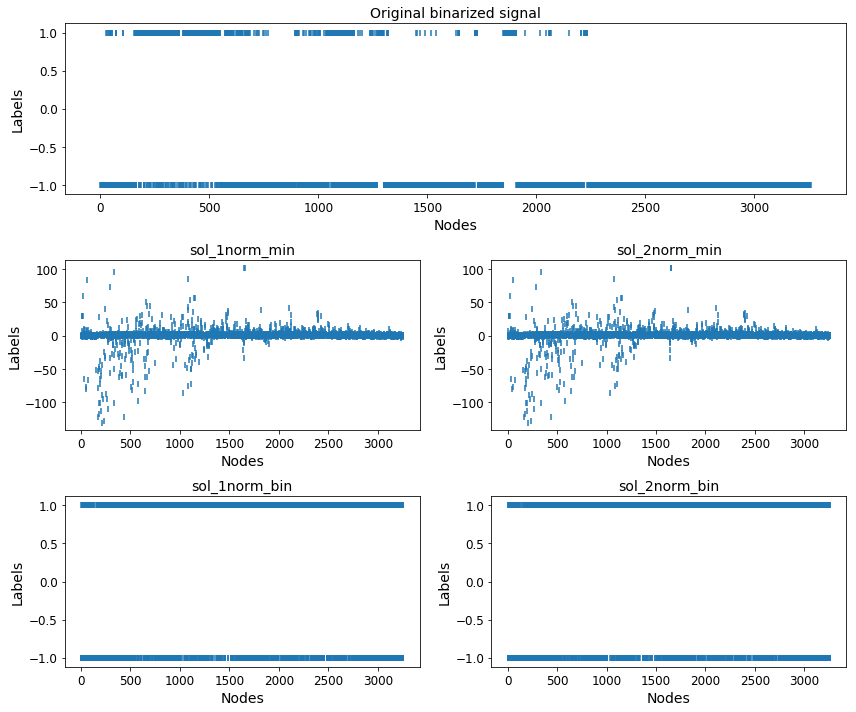

In [774]:
fig, ax = plt.subplots(3,2,figsize=(12,10))
ax[0,0].remove()
ax[0,1].remove()
axs = fig.add_subplot(311)
x = np.arange(n_nodes)
axs.scatter(x, labels_bin, marker='|')
axs.set_xlabel('Nodes',fontdict={'fontsize':14})
axs.set_ylabel('Labels',fontdict={'fontsize':14})
axs.set_title('Original binarized signal',fontdict={'fontsize':14})
axs.tick_params(labelsize = 12)
for i, key in enumerate(rel_err_comp.keys()):
    exec('%s = %s' % ('temp', key))
    loc = [int(i / 2) + 1, i % 2]
    ax[loc[0], loc[1]].tick_params(labelsize = 12)
    ax[loc[0], loc[1]].scatter(x, temp, marker='|')
    ax[loc[0], loc[1]].set_xlabel('Nodes',fontdict={'fontsize':14})
    ax[loc[0], loc[1]].set_ylabel('Labels',fontdict={'fontsize':14})
    ax[loc[0], loc[1]].set_title(key, fontdict={'fontsize':14})
fig.tight_layout()

Plot, on your graph, the original `labels_bin` signal, as well as the solutions to the variational problems (both binarized and otherwise). Indicate on each plot the value of the relative error $\text{rel-err} = \frac{\|\text{labels_bin} - z\|_2}{\|\text{labels_bin}\|_2}$, where $z$ is the signal in the corresponding plot.

### Question 16

Now that you have got a feeling for the sort of solutions that the transductive learning problems studied can give, we will see what is the effect of the number of measurements on the accuracy of both $p-$norm minimization problems.

Towards this goal, you will write a `phase_transition()` function. This function will basically go over all the procedures that you have implemented in this section, but for varying numbers of measurements and thresholding values. It will also compute the relative error, $\text{rel-err},$ of the solutions and average them over a number of trials.

The output of the `phase_transition()` function has to be a matrix with `len(mn_ratios)` columns and `len(thresholds)` rows. Each pixel $(i,j)$ in the output matrix has to contain the average, over `n_trials` trials, of the relative error $\text{rel-err}$ in the binarized (with threshold `thresholds[i]`) solution given by `graph_pnorm_interpolation()` from observing an `mn_ratios[j]` fraction of nodes. The randomness comes from a different choice of mask `w` at each trial, hence the averaging.

The interest of this phase transition matrix is to assess what level of recovery error one could expect for a certain fraction of measurements and a certain threshold level.

In [653]:
def phase_transition(mn_ratios, thresholds, n_trials, labels_bin, p):

    # Create sample mask.
    
    # Solve p-norm interpolation.
    
    # Aggregate.
    row = len(thresholds)
    col = len(mn_ratios)
    pt_matrix = np.zeros([row, col])
    idx = np.array(np.meshgrid(np.arange(row), np.arange(col), np.arange(n_trials))).T.reshape(-1, 3)
    for i in idx:
        threshold_i = thresholds[i[0]]
        mn_ratios_i = mn_ratios[i[1]]
        m = int(mn_ratios_i * n_nodes)  # Number of measurements.
        w = np.ones_like(labels_bin)
        mask_idx = np.random.RandomState(i[0] * 10 + i[1]).permutation(n_nodes)[0:(n_nodes - m)]
        w[mask_idx] = 0
        x0_bin = np.random.randn(n_nodes)
        x0_bin[w == 1] = labels_bin[w == 1]
        sol_p_norm_bin = graph_pnorm_interpolation(gradient, P, x0 = x0_bin, p=p, maxit = 3000)
        pred_label = np.zeros_like(sol_p_norm_bin) - 1
        pred_label[sol_p_norm_bin >= threshold_i] = 1
        pt_matrix[i[0], i[1]] += rel_err(labels_bin, pred_label)
    return pt_matrix / n_trials

### Question 17

Pick 5 "m/n" ratios in $(0, 1)$ and 5 threshold levels in $(-1, 1)$ and run the `phase_transition()` function with `n_trials` = 20, for both $p = 1$ and $p = 2$.

In [791]:
mn_ratios = np.matlib.linspace(0.2 * np.random.rand(1), 1, 5, endpoint=False)
print('mn_ratios:', (*np.round(mn_ratios,2)))
thresholds = np.matlib.linspace(0.4 * np.random.rand(1) - 1, 1, 5, endpoint=False)
print('thresholds:', (*np.round(thresholds,2)))

mn_ratios: 0.07 0.26 0.44 0.63 0.81
thresholds: -0.61 -0.29 0.03 0.36 0.68


In [656]:
pt_matrix_1norm = phase_transition(mn_ratios, thresholds, n_trials=20, labels_bin=labels_bin, p=1)

pt_matrix_2norm = phase_transition(mn_ratios, thresholds, n_trials=20, labels_bin=labels_bin, p=2)

Solution found after 765 iterations:
    objective function f(sol) = 8.713595e+05
    stopping criterion: RTOL
1.6776055058327535
Solution found after 675 iterations:
    objective function f(sol) = 9.733501e+05
    stopping criterion: RTOL
1.635371521176061
Solution found after 645 iterations:
    objective function f(sol) = 9.492427e+05
    stopping criterion: RTOL
1.5989410426307606
Solution found after 4 iterations:
    objective function f(sol) = 2.364680e+04
    stopping criterion: RTOL
0.964544831579341
Solution found after 643 iterations:
    objective function f(sol) = 9.434366e+05
    stopping criterion: RTOL
1.5019676161131823
Solution found after 799 iterations:
    objective function f(sol) = 9.546197e+05
    stopping criterion: RTOL
1.605834712624948
Solution found after 681 iterations:
    objective function f(sol) = 9.032989e+05
    stopping criterion: RTOL
1.5734058643956934
Solution found after 654 iterations:
    objective function f(sol) = 9.576970e+05
    stopping 

Solution found after 634 iterations:
    objective function f(sol) = 9.298158e+05
    stopping criterion: RTOL
1.4148643240743999
Solution found after 730 iterations:
    objective function f(sol) = 9.849347e+05
    stopping criterion: RTOL
1.4908949393433322
Solution found after 675 iterations:
    objective function f(sol) = 1.021228e+06
    stopping criterion: RTOL
1.4668265880250535
Solution found after 631 iterations:
    objective function f(sol) = 9.805617e+05
    stopping criterion: RTOL
1.4226502458442178
Solution found after 634 iterations:
    objective function f(sol) = 9.670032e+05
    stopping criterion: RTOL
1.3978460614593016
Solution found after 630 iterations:
    objective function f(sol) = 9.172928e+05
    stopping criterion: RTOL
1.374827390209032
Solution found after 744 iterations:
    objective function f(sol) = 1.007991e+06
    stopping criterion: RTOL
1.435960376587667
Solution found after 721 iterations:
    objective function f(sol) = 1.031708e+06
    stoppi

Solution found after 627 iterations:
    objective function f(sol) = 9.381018e+05
    stopping criterion: RTOL
1.5628394077516736
Solution found after 633 iterations:
    objective function f(sol) = 9.786008e+05
    stopping criterion: RTOL
1.5019676161131823
Solution found after 700 iterations:
    objective function f(sol) = 1.023745e+06
    stopping criterion: RTOL
1.6092704736936863
Solution found after 658 iterations:
    objective function f(sol) = 8.890131e+05
    stopping criterion: RTOL
1.5831267394273603
Solution found after 685 iterations:
    objective function f(sol) = 9.927715e+05
    stopping criterion: RTOL
1.5274917520137654
Solution found after 629 iterations:
    objective function f(sol) = 9.175398e+05
    stopping criterion: RTOL
1.515391019407172
Solution found after 4 iterations:
    objective function f(sol) = 2.175680e+04
    stopping criterion: RTOL
0.63448993510844
Solution found after 695 iterations:
    objective function f(sol) = 9.546504e+05
    stopping 

Solution found after 635 iterations:
    objective function f(sol) = 8.851149e+05
    stopping criterion: RTOL
1.4291061113107386
Solution found after 600 iterations:
    objective function f(sol) = 9.177498e+05
    stopping criterion: RTOL
1.4109552517027095
Solution found after 612 iterations:
    objective function f(sol) = 9.393966e+05
    stopping criterion: RTOL
1.3792838926265458
Solution found after 742 iterations:
    objective function f(sol) = 9.554064e+05
    stopping criterion: RTOL
1.4273874021966417
Solution found after 675 iterations:
    objective function f(sol) = 9.296230e+05
    stopping criterion: RTOL
1.4087788579164677
Solution found after 694 iterations:
    objective function f(sol) = 9.527934e+05
    stopping criterion: RTOL
1.374827390209032
Solution found after 622 iterations:
    objective function f(sol) = 9.332633e+05
    stopping criterion: RTOL
1.3716992237206878
Solution found after 614 iterations:
    objective function f(sol) = 9.515852e+05
    stopp

Solution found after 656 iterations:
    objective function f(sol) = 9.221193e+05
    stopping criterion: RTOL
1.569891614374606
Solution found after 649 iterations:
    objective function f(sol) = 9.267654e+05
    stopping criterion: RTOL
1.5375029468086325
Solution found after 672 iterations:
    objective function f(sol) = 9.285036e+05
    stopping criterion: RTOL
1.496646553193385
Solution found after 648 iterations:
    objective function f(sol) = 9.710073e+05
    stopping criterion: RTOL
1.452532150119584
Solution found after 780 iterations:
    objective function f(sol) = 9.759819e+05
    stopping criterion: RTOL
1.5442734885855962
Solution found after 694 iterations:
    objective function f(sol) = 9.110010e+05
    stopping criterion: RTOL
1.5093042722774028
Solution found after 655 iterations:
    objective function f(sol) = 1.015561e+06
    stopping criterion: RTOL
1.4784947106396367
Solution found after 647 iterations:
    objective function f(sol) = 9.351846e+05
    stoppin

Solution found after 727 iterations:
    objective function f(sol) = 1.051021e+06
    stopping criterion: RTOL
1.4256666210982336
Solution found after 679 iterations:
    objective function f(sol) = 9.357274e+05
    stopping criterion: RTOL
1.4065990966573945
Solution found after 698 iterations:
    objective function f(sol) = 9.813942e+05
    stopping criterion: RTOL
1.3770574442135692
Solution found after 652 iterations:
    objective function f(sol) = 9.179588e+05
    stopping criterion: RTOL
1.3627220381192273
Solution found after 616 iterations:
    objective function f(sol) = 9.155487e+05
    stopping criterion: RTOL
1.3354284449701792
Solution found after 734 iterations:
    objective function f(sol) = 8.984197e+05
    stopping criterion: RTOL
1.6640154836771057
Solution found after 688 iterations:
    objective function f(sol) = 9.684345e+05
    stopping criterion: RTOL
1.6346208341862318
Solution found after 658 iterations:
    objective function f(sol) = 1.007115e+06
    stop

Solution found after 579 iterations:
    objective function f(sol) = 8.845117e+05
    stopping criterion: RTOL
1.4550649020868645
Solution found after 765 iterations:
    objective function f(sol) = 9.638478e+05
    stopping criterion: RTOL
1.5569381680196919
Solution found after 721 iterations:
    objective function f(sol) = 9.447899e+05
    stopping criterion: RTOL
1.5262859959368904
Solution found after 666 iterations:
    objective function f(sol) = 8.903795e+05
    stopping criterion: RTOL
1.4822256719610667
Solution found after 667 iterations:
    objective function f(sol) = 9.209101e+05
    stopping criterion: RTOL
1.458435062715205
Solution found after 576 iterations:
    objective function f(sol) = 9.461533e+05
    stopping criterion: RTOL
1.4118248698140532
Solution found after 793 iterations:
    objective function f(sol) = 1.005852e+06
    stopping criterion: RTOL
1.4941842868373383
Solution found after 689 iterations:
    objective function f(sol) = 9.988050e+05
    stopp

Solution found after 636 iterations:
    objective function f(sol) = 9.729126e+05
    stopping criterion: RTOL
1.3518707277545738
Solution found after 634 iterations:
    objective function f(sol) = 9.314086e+05
    stopping criterion: RTOL
1.34914426300735
Solution found after 714 iterations:
    objective function f(sol) = 9.285551e+05
    stopping criterion: RTOL
1.6651215093782707
Solution found after 669 iterations:
    objective function f(sol) = 9.226958e+05
    stopping criterion: RTOL
1.634996220764653
Solution found after 642 iterations:
    objective function f(sol) = 9.535588e+05
    stopping criterion: RTOL
1.5827390507379602
Solution found after 638 iterations:
    objective function f(sol) = 9.299338e+05
    stopping criterion: RTOL
1.5462591824604817
Solution found after 591 iterations:
    objective function f(sol) = 9.127337e+05
    stopping criterion: RTOL
1.499923287390954
Solution found after 720 iterations:
    objective function f(sol) = 8.920722e+05
    stopping

Solution found after 154 iterations:
    objective function f(sol) = 1.292555e+05
    stopping criterion: RTOL
1.0357227880910487
Solution found after 153 iterations:
    objective function f(sol) = 1.453749e+05
    stopping criterion: RTOL
0.8422707803939121
Solution found after 210 iterations:
    objective function f(sol) = 9.339721e+04
    stopping criterion: RTOL
0.6128420105180322
Solution found after 63 iterations:
    objective function f(sol) = 1.995656e+05
    stopping criterion: RTOL
1.246043138957225
Solution found after 107 iterations:
    objective function f(sol) = 1.860130e+05
    stopping criterion: RTOL
1.1491955909636415
Solution found after 102 iterations:
    objective function f(sol) = 1.757488e+05
    stopping criterion: RTOL
0.9549534945437562
Solution found after 149 iterations:
    objective function f(sol) = 1.319646e+05
    stopping criterion: RTOL
0.8050164902379816
Solution found after 202 iterations:
    objective function f(sol) = 1.009940e+05
    stoppi

Solution found after 110 iterations:
    objective function f(sol) = 1.748918e+05
    stopping criterion: RTOL
1.3640723823363767
Solution found after 156 iterations:
    objective function f(sol) = 1.412603e+05
    stopping criterion: RTOL
1.1890881605561112
Solution found after 142 iterations:
    objective function f(sol) = 1.517468e+05
    stopping criterion: RTOL
0.9834469192064176
Solution found after 161 iterations:
    objective function f(sol) = 1.236491e+05
    stopping criterion: RTOL
0.6838333910984614
Solution found after 85 iterations:
    objective function f(sol) = 1.770345e+05
    stopping criterion: RTOL
1.4697523028899329
Solution found after 93 iterations:
    objective function f(sol) = 1.764980e+05
    stopping criterion: RTOL
1.3038051799341321
Solution found after 127 iterations:
    objective function f(sol) = 1.505538e+05
    stopping criterion: RTOL
1.135226354942538
Solution found after 160 iterations:
    objective function f(sol) = 1.340659e+05
    stoppin

Solution found after 106 iterations:
    objective function f(sol) = 1.857590e+05
    stopping criterion: RTOL
1.137926064712093
Solution found after 105 iterations:
    objective function f(sol) = 1.826213e+05
    stopping criterion: RTOL
0.9600807984817623
Solution found after 146 iterations:
    objective function f(sol) = 1.433485e+05
    stopping criterion: RTOL
0.7762981684068709
Solution found after 165 iterations:
    objective function f(sol) = 1.180137e+05
    stopping criterion: RTOL
0.565989102104026
Solution found after 91 iterations:
    objective function f(sol) = 2.003372e+05
    stopping criterion: RTOL
1.135226354942538
Solution found after 68 iterations:
    objective function f(sol) = 2.096620e+05
    stopping criterion: RTOL
1.0357227880910487
Solution found after 90 iterations:
    objective function f(sol) = 1.812158e+05
    stopping criterion: RTOL
0.9041176135314933
Solution found after 130 iterations:
    objective function f(sol) = 1.375342e+05
    stopping c

Solution found after 77 iterations:
    objective function f(sol) = 1.760979e+05
    stopping criterion: RTOL
1.4596968668987822
Solution found after 116 iterations:
    objective function f(sol) = 1.662589e+05
    stopping criterion: RTOL
1.3070958418326162
Solution found after 116 iterations:
    objective function f(sol) = 1.711061e+05
    stopping criterion: RTOL
1.1254537798123994
Solution found after 142 iterations:
    objective function f(sol) = 1.295939e+05
    stopping criterion: RTOL
0.9169234951286795
Solution found after 155 iterations:
    objective function f(sol) = 1.306614e+05
    stopping criterion: RTOL
0.6459921996912829
Solution found after 69 iterations:
    objective function f(sol) = 1.977165e+05
    stopping criterion: RTOL
1.3690122491058663
Solution found after 108 iterations:
    objective function f(sol) = 1.668798e+05
    stopping criterion: RTOL
1.2331714701566137
Solution found after 130 iterations:
    objective function f(sol) = 1.482338e+05
    stoppi

Solution found after 182 iterations:
    objective function f(sol) = 1.004652e+05
    stopping criterion: RTOL
0.5788541336196811
Solution found after 86 iterations:
    objective function f(sol) = 2.057636e+05
    stopping criterion: RTOL
1.143306359792164
Solution found after 91 iterations:
    objective function f(sol) = 1.939205e+05
    stopping criterion: RTOL
1.029184444024506
Solution found after 90 iterations:
    objective function f(sol) = 1.993288e+05
    stopping criterion: RTOL
0.8751451902511023
Solution found after 142 iterations:
    objective function f(sol) = 1.430846e+05
    stopping criterion: RTOL
0.7448297807355955
Solution found after 188 iterations:
    objective function f(sol) = 1.059417e+05
    stopping criterion: RTOL
0.5777929885777309
Solution found after 72 iterations:
    objective function f(sol) = 1.889961e+05
    stopping criterion: RTOL
1.5533866633280529
Solution found after 98 iterations:
    objective function f(sol) = 1.931194e+05
    stopping cr

Solution found after 152 iterations:
    objective function f(sol) = 1.199428e+05
    stopping criterion: RTOL
0.9162539634620894
Solution found after 151 iterations:
    objective function f(sol) = 1.218237e+05
    stopping criterion: RTOL
0.6393076955183172
Solution found after 80 iterations:
    objective function f(sol) = 2.027251e+05
    stopping criterion: RTOL
1.344587869503361
Solution found after 125 iterations:
    objective function f(sol) = 1.636747e+05
    stopping criterion: RTOL
1.2024318204825035
Solution found after 124 iterations:
    objective function f(sol) = 1.636507e+05
    stopping criterion: RTOL
1.0695368972566741
Solution found after 150 iterations:
    objective function f(sol) = 1.345411e+05
    stopping criterion: RTOL
0.8631418237558292
Solution found after 157 iterations:
    objective function f(sol) = 1.204513e+05
    stopping criterion: RTOL
0.6168345088366954
Solution found after 68 iterations:
    objective function f(sol) = 1.993048e+05
    stoppin

Solution found after 140 iterations:
    objective function f(sol) = 1.531312e+05
    stopping criterion: RTOL
0.7464758154077377
Solution found after 186 iterations:
    objective function f(sol) = 1.079232e+05
    stopping criterion: RTOL
0.5914393902308686
Solution found after 52 iterations:
    objective function f(sol) = 2.156971e+05
    stopping criterion: RTOL
1.5608748068396043
Solution found after 59 iterations:
    objective function f(sol) = 2.047626e+05
    stopping criterion: RTOL
1.3837260422674333
Solution found after 124 iterations:
    objective function f(sol) = 1.551446e+05
    stopping criterion: RTOL
1.2100631546716705
Solution found after 126 iterations:
    objective function f(sol) = 1.509462e+05
    stopping criterion: RTOL
0.9771868497408956
Solution found after 190 iterations:
    objective function f(sol) = 1.042126e+05
    stopping criterion: RTOL
0.7085156856650279
Solution found after 79 iterations:
    objective function f(sol) = 1.892518e+05
    stoppin

Solution found after 108 iterations:
    objective function f(sol) = 1.817601e+05
    stopping criterion: RTOL
1.055094742484431
Solution found after 134 iterations:
    objective function f(sol) = 1.386291e+05
    stopping criterion: RTOL
0.8695171885291235
Solution found after 216 iterations:
    objective function f(sol) = 9.421369e+04
    stopping criterion: RTOL
0.5986586212773539
Solution found after 70 iterations:
    objective function f(sol) = 2.023213e+05
    stopping criterion: RTOL
1.2391288549284507
Solution found after 99 iterations:
    objective function f(sol) = 1.817965e+05
    stopping criterion: RTOL
1.1384652384285419
Solution found after 136 iterations:
    objective function f(sol) = 1.479424e+05
    stopping criterion: RTOL
0.9568794531279001
Solution found after 140 iterations:
    objective function f(sol) = 1.517269e+05
    stopping criterion: RTOL
0.8103352035226651
Solution found after 202 iterations:
    objective function f(sol) = 9.764693e+04
    stoppin

In [658]:
from matplotlib import cm

Plot both phase transition matrices as images with a colorbar. Make sure to properly name the axes and title the images. 

In [841]:
pt_dict = {'pt_matrix_1norm': pt_matrix_1norm,
          'pt_matrix_2norm': pt_matrix_2norm}

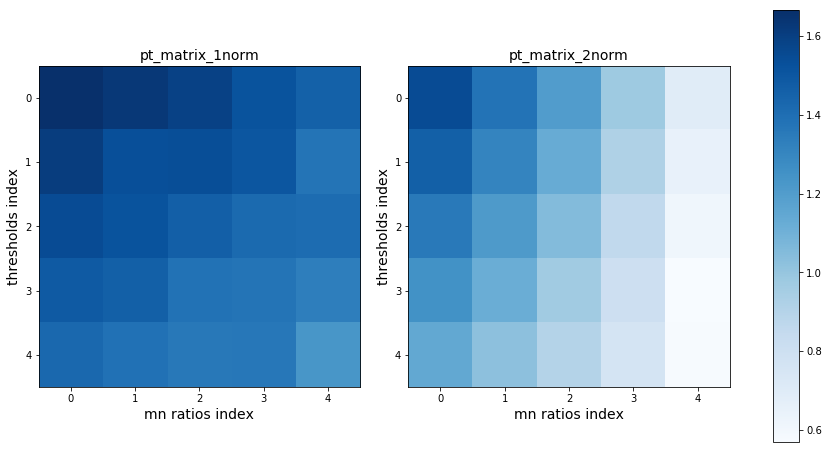

In [859]:
fig, ax = plt.subplots(1,2, figsize=(12,10))
lower_bound = np.min([pt_matrix_1norm,pt_matrix_2norm])
upper_bound = np.max([pt_matrix_1norm,pt_matrix_2norm])
for i, key in enumerate(pt_dict.keys()):
    im = ax[i].imshow(pt_dict[key], cmap=cm.Blues, vmin=lower_bound, vmax = upper_bound)
    ax[i].set_title(key,fontdict={'fontsize':14})
    ax[i].set_xlabel('mn ratios index',fontdict={'fontsize':14})
    ax[i].set_ylabel('thresholds index',fontdict={'fontsize':14})

fig.subplots_adjust(bottom=0.1, top=0.9, left=-0.1, right=0.7,
                    wspace=0.15, hspace=0.2)
# add an axes, lower left corner in [0.83, 0.1] measured in figure coordinate with axes width 0.02 and height 0.8
cb_ax = fig.add_axes([0.75, 0.2, 0.03, 0.6])
cbar = fig.colorbar(im, cax=cb_ax)

### Question 18

Do the phase transition plots above provide any justification for choosing one $p-$norm interpolation over the other? Why?

**Answer** Yes. the p-norm with pt_matrix image most of which blocks are in light color may be the best choice.